# Series de tiempo

https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru

Señales con características temporales

## Redes recurrentes

Las redes neuronales recurrentes son una generalización de las redes neuronales feedforward que tienen una memoria interna. La RNN es recurrente por naturaleza, ya que realiza la misma función para cada entrada de datos, mientras que la salida de la entrada actual depende del cálculo anterior. Después de producir la salida, se copia y se envía de nuevo a la red recurrente. Para tomar una decisión, considera la entrada actual y la salida que ha aprendido de la entrada anterior.
A diferencia de las redes neuronales de avance, las RNN pueden utilizar su estado interno (memoria) para procesar secuencias de entradas. Esto las hace aplicables a tareas como el reconocimiento de la escritura a mano no segmentada y conectada o el reconocimiento del habla. En otras redes neuronales, todas las entradas son independientes entre sí. Pero en las RNN, todas las entradas están relacionadas entre sí


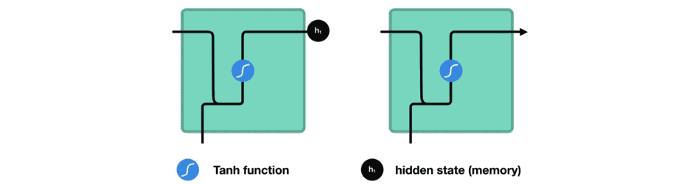

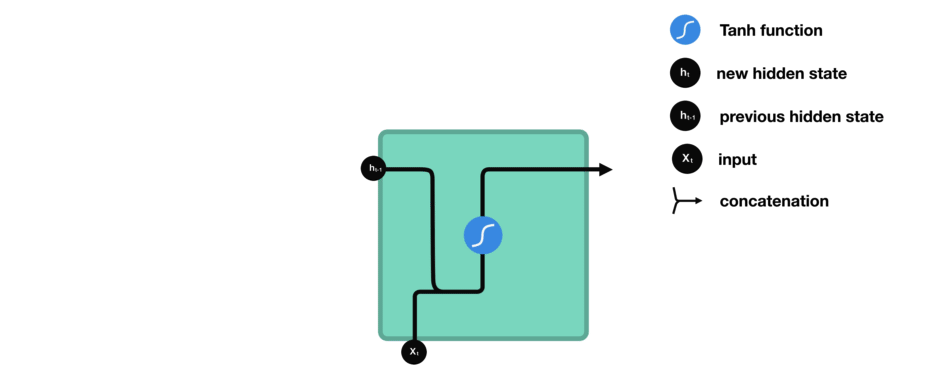

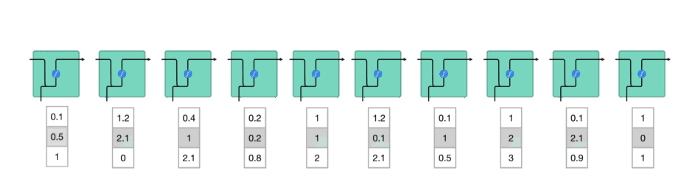

Estas redes sufren de memoria a corto plazo.

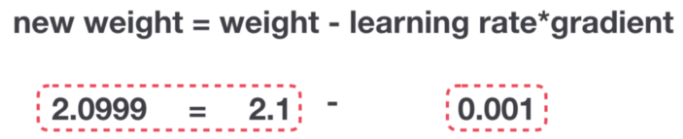![image.png](
  
)

Veamos un poco más de detalle...

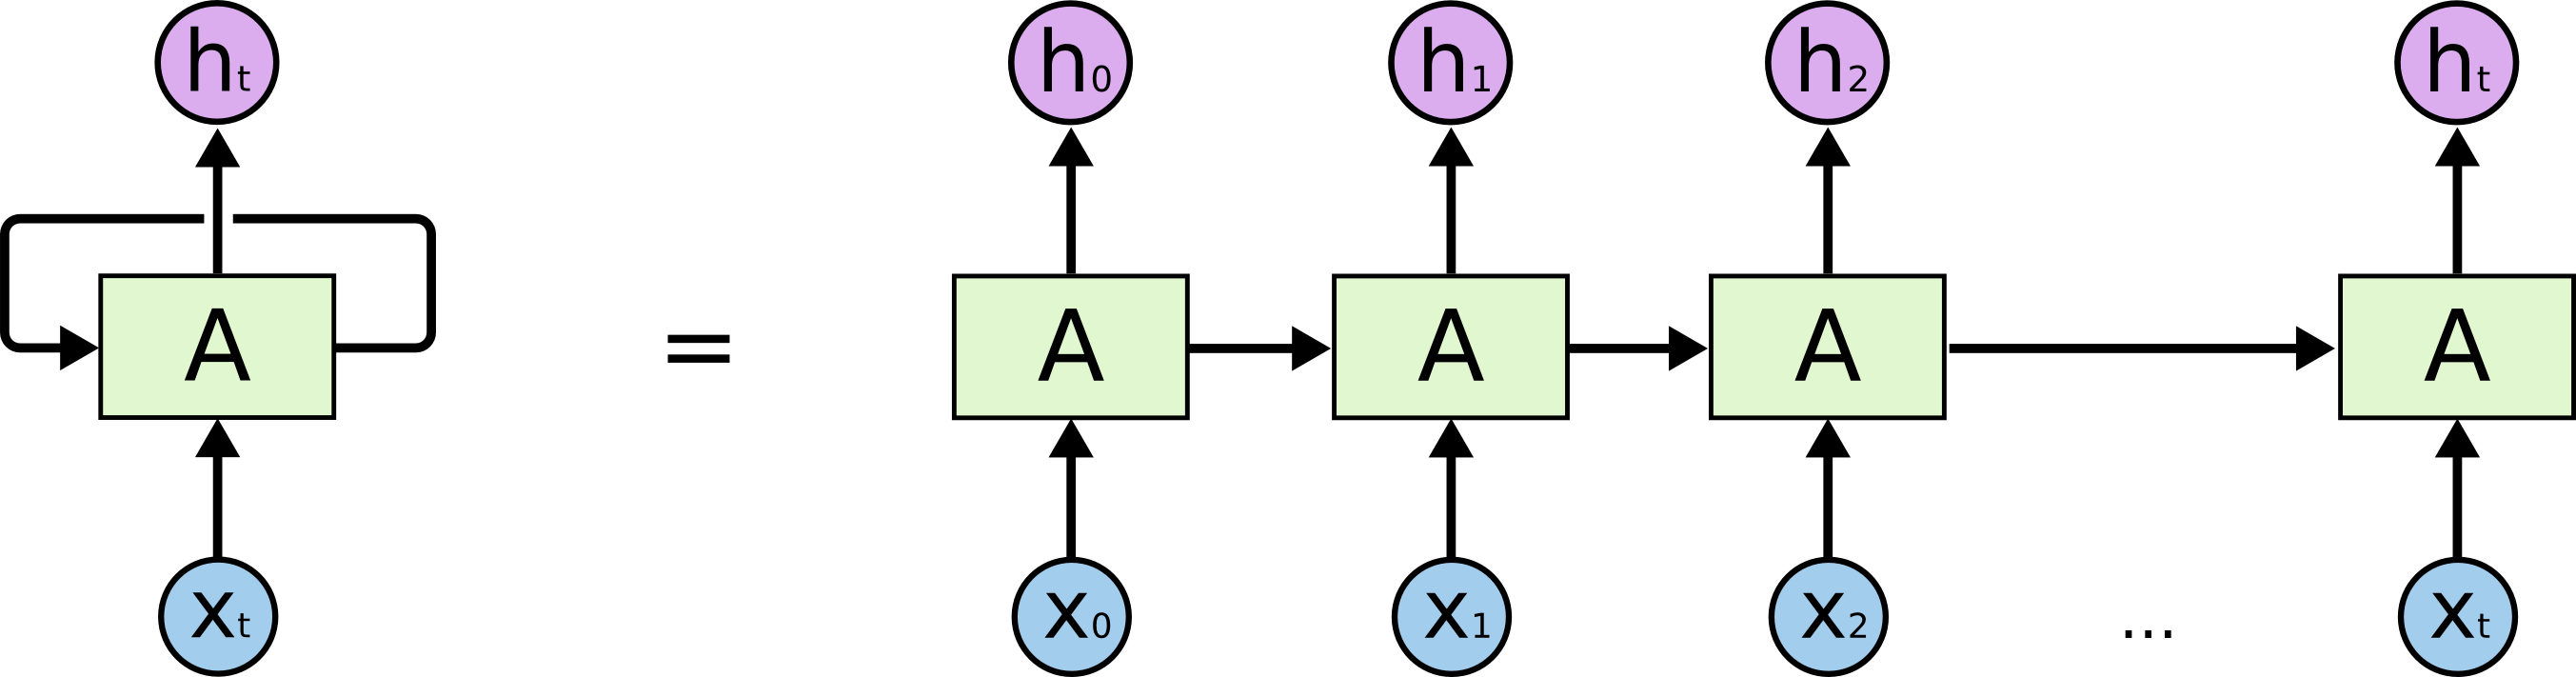

En el diagrama anterior, un elemento de red neuronal, A, observa una entrada $x_t$ y emite un valor $h_t$. Un bucle permite pasar la información de un paso de la red al siguiente


Vamos a pensar en señales de lenguaje natural

Si tratamos de predecir lo que sigue a  la cadena

"Hay nubes en el ..."

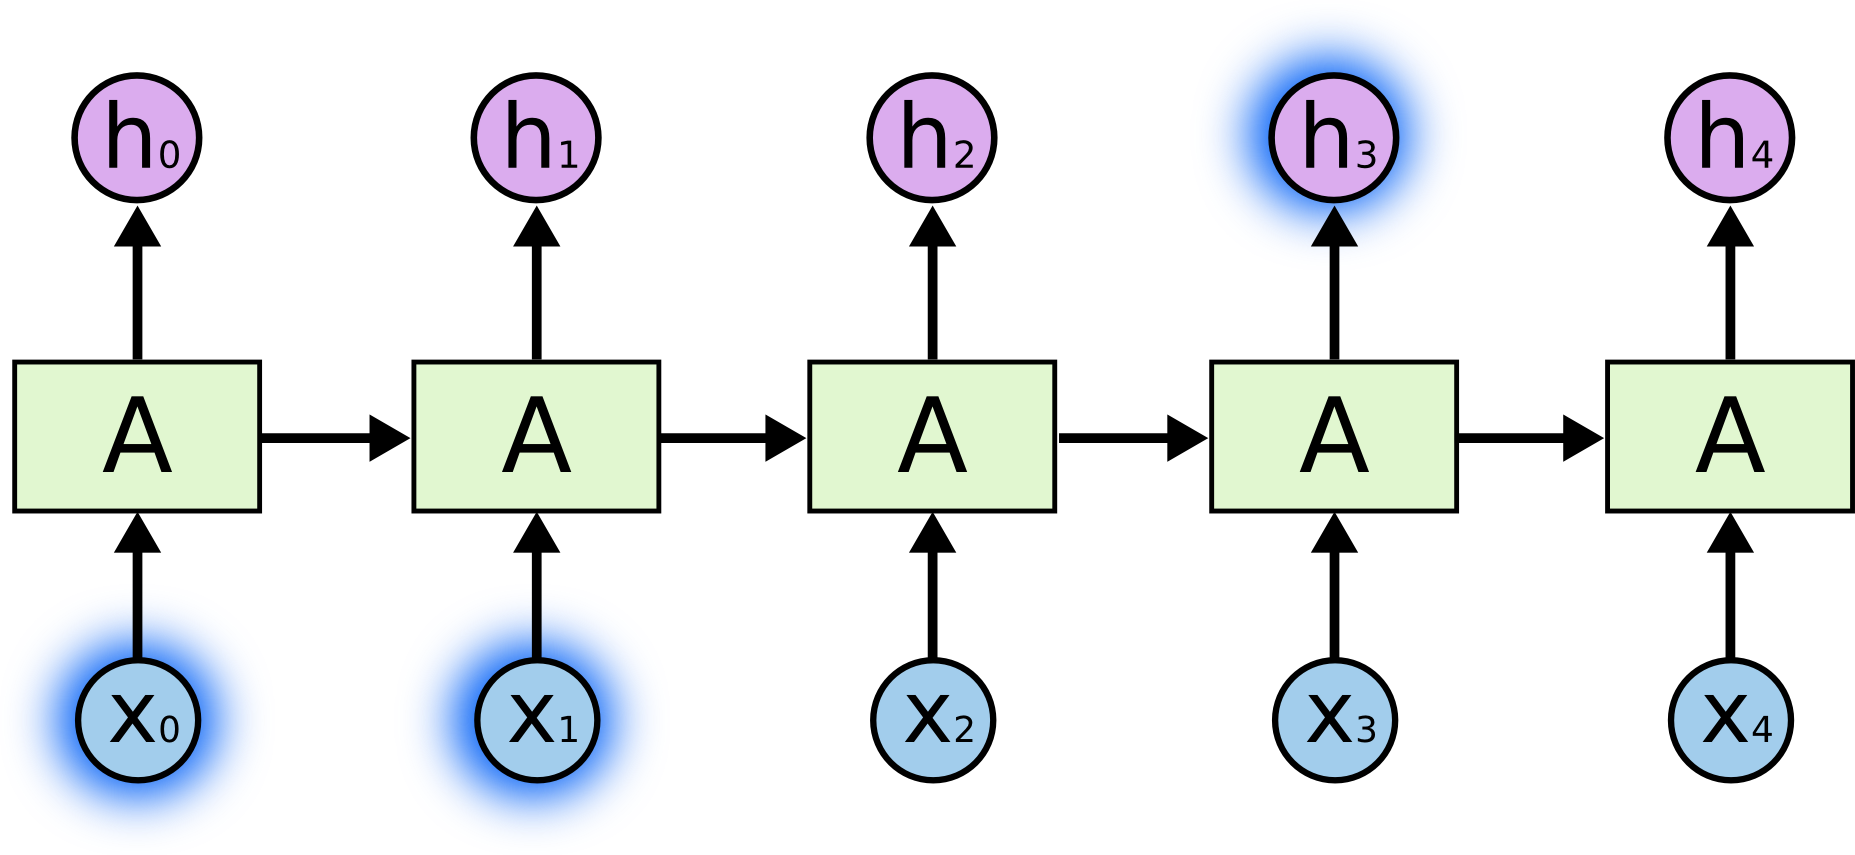

Sin embargo, existen ideas que requieren un contexto..



"Yo crecí en México... Hablo fluidamente el..."

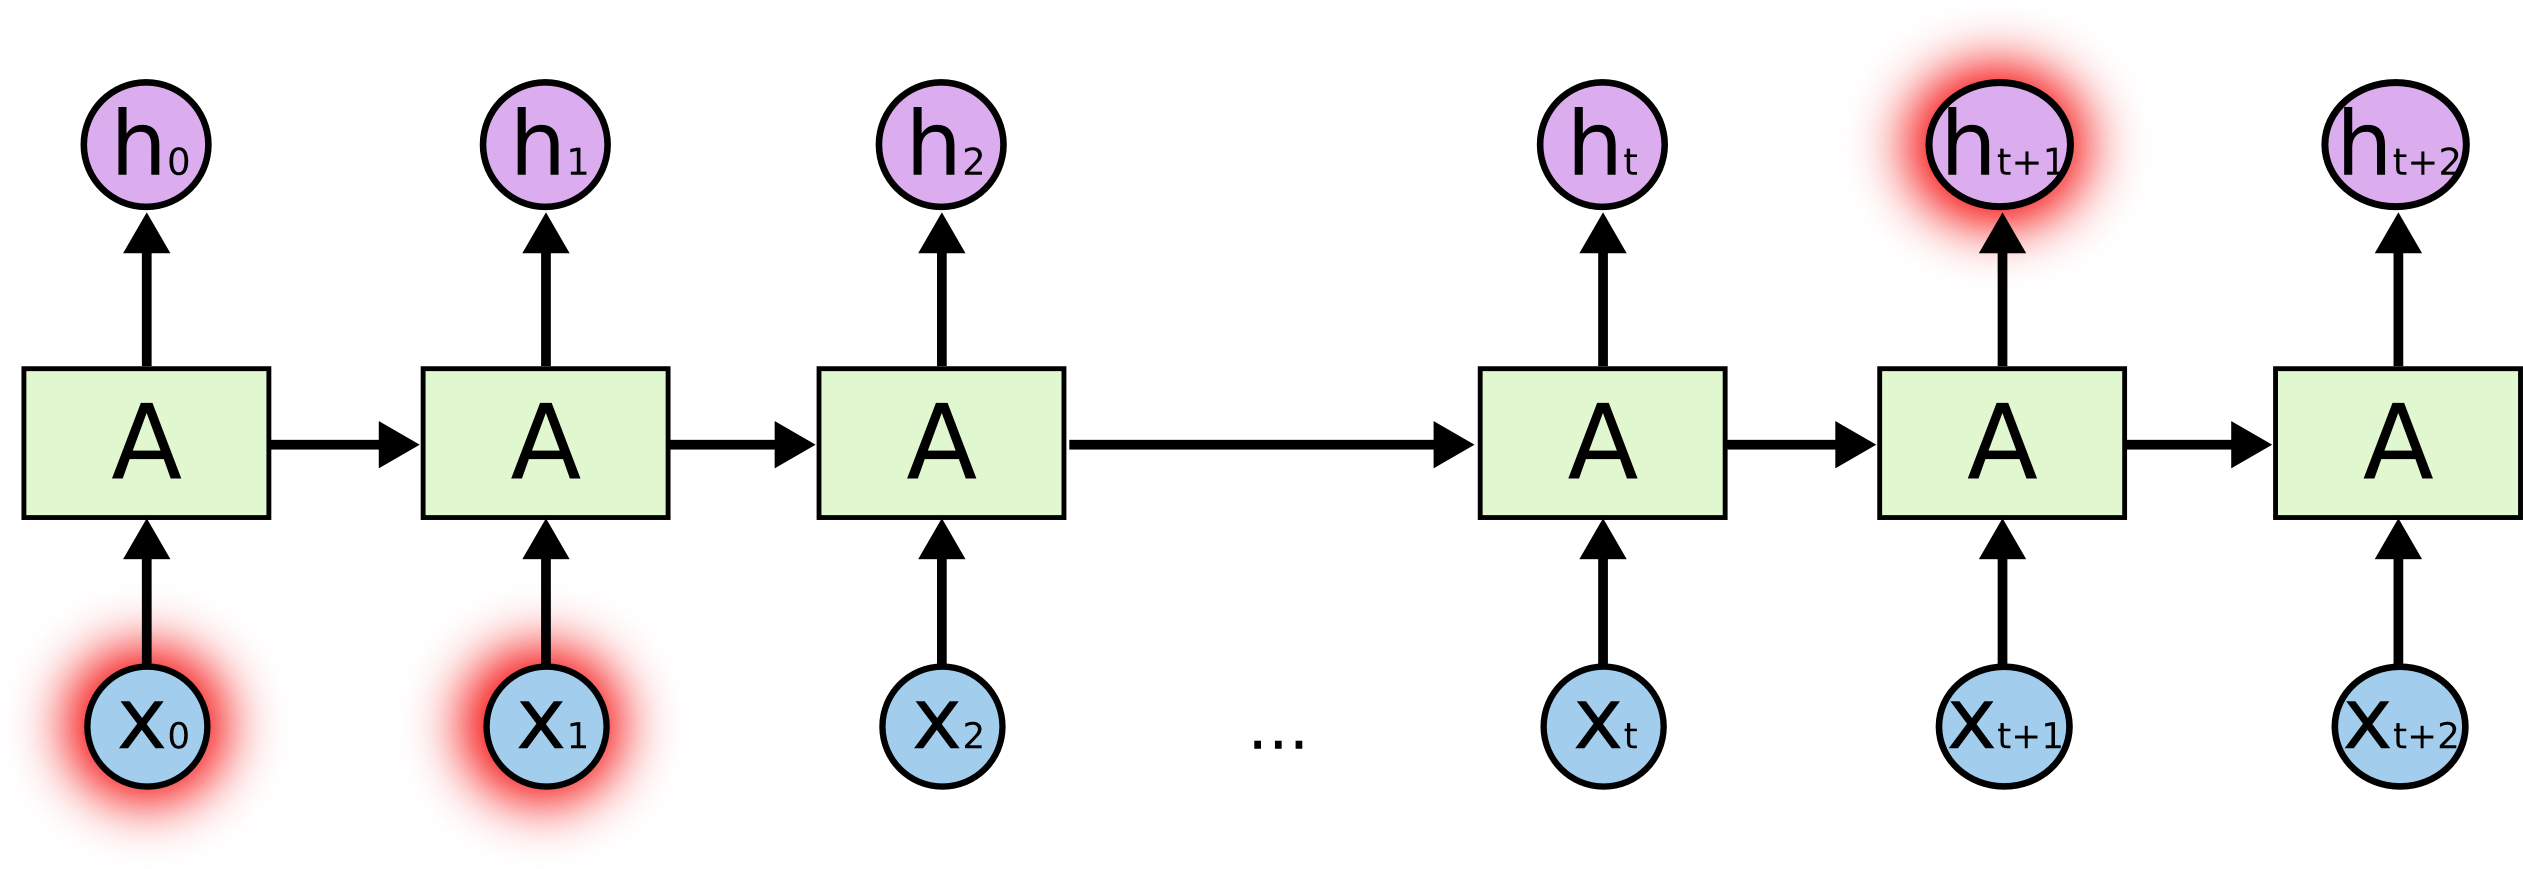

Está demostrado que las RNN's son capaces de manejar dependencias a "largo plazo".

http://people.idsia.ch/~juergen/SeppHochreiter1991ThesisAdvisorSchmidhuber.pdf
http://www-dsi.ing.unifi.it/~paolo/ps/tnn-94-gradient.pdf

Pero nadie ha encontrado como poder ajustar sus pesos.


# LSTM y GRU's

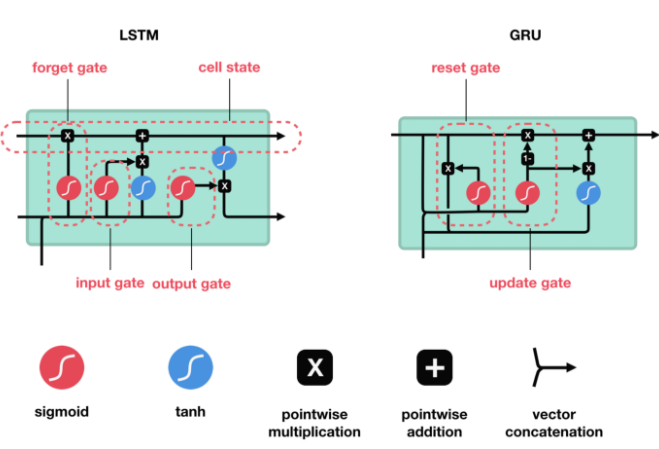

## LSTM

Propuestas en 1997 por Hochreiter y Schmidhuber
http://www.bioinf.jku.at/publications/older/2604.pdf

El concepto central de las LSTM es el estado de la celda y sus diversas compuertas. El estado de la celda actúa como una autopista de transporte que transfiere información relativa a lo largo de la cadena de secuencias. Se puede considerar como la "memoria" de la red. El estado de la célula, en teoría, puede transportar información relevante a lo largo del procesamiento de la secuencia. Así, incluso la información de los primeros pasos temporales puede llegar a los posteriores, reduciendo los efectos de la memoria a corto plazo. A medida que el estado de la celda avanza, la información se añade o se elimina del estado de la celda a través de puertas. Las compuertas son diferentes redes neuronales que deciden qué información está permitida en el estado de la celda. Las compuertas pueden aprender qué información es relevante para conservar u olvidar durante el entrenamiento.


### Compuerta "Forget"

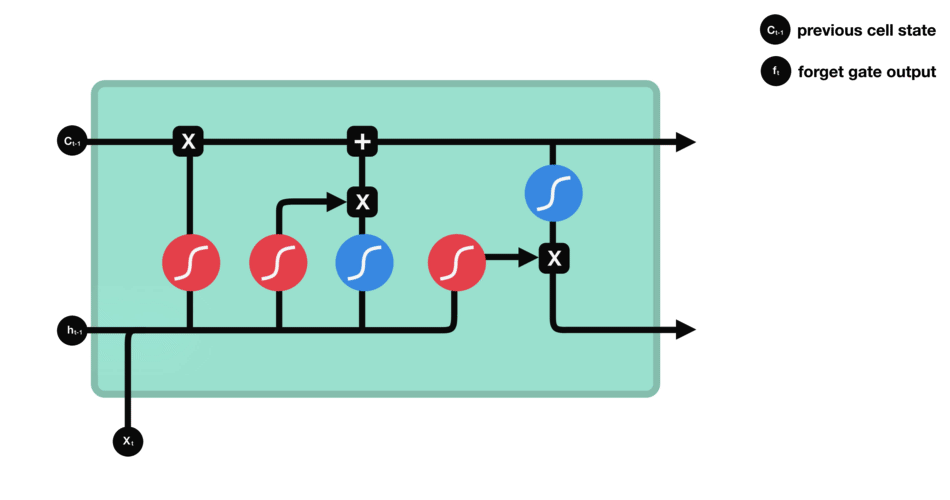

### Compuerta "Input"

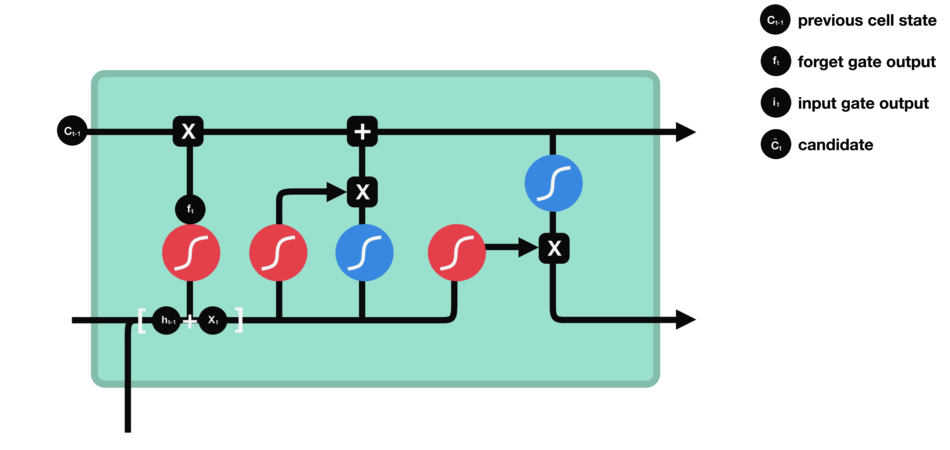

### Estado de la celda

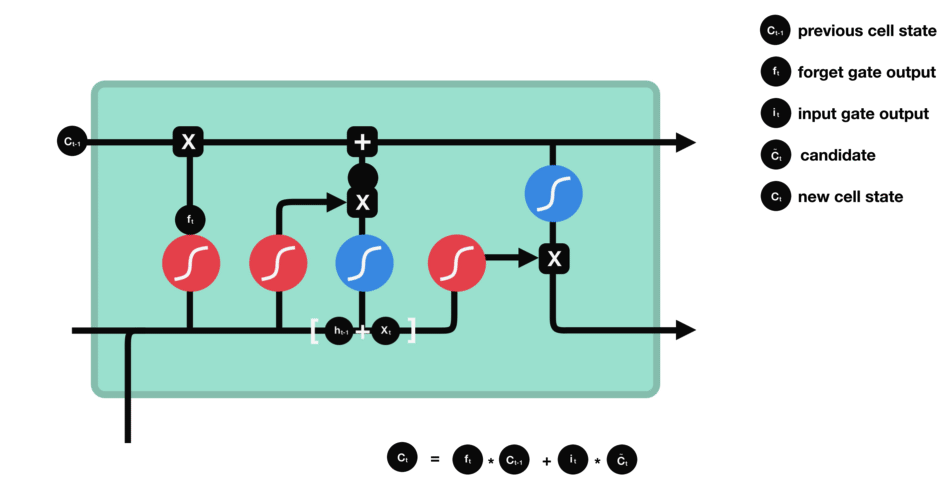

### Compuerta "output"

## GRU

Propuestas en 2014 por Cho et al.

https://arxiv.org/pdf/1406.1078v3.pdf

Enfocada también en evitar el problema del desvanecimiento de gradiente.

Puede ser considerada una variación de las LSTM.

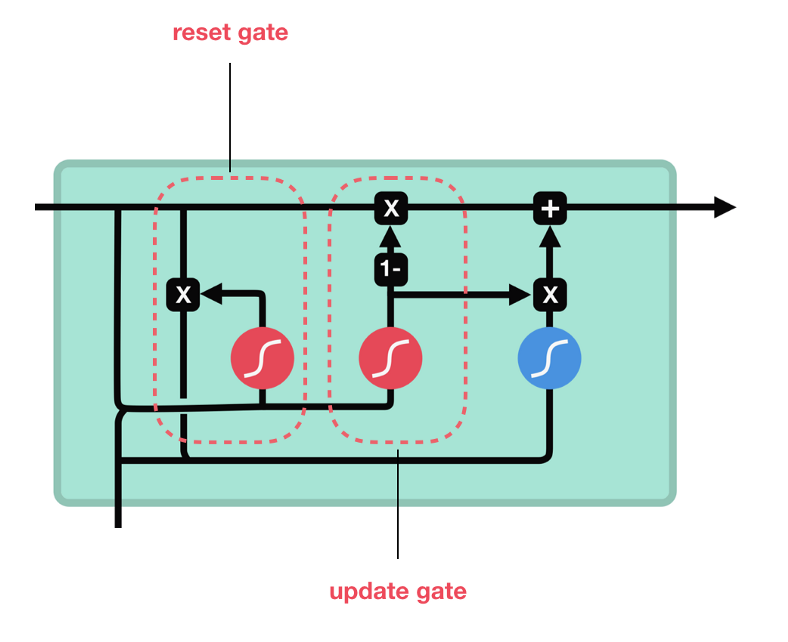

Vamos a hacer algo de Procesamiento de Lenguaje Natural

## Algunos conceptos

- Corpus
- Tokens  
- "Word embedding"

## "Word embedding"

¿Porqué es necesario?

¿Cómo meteriamos la cadena : "La casa es azul" a una red neuronal?

La -> [1,0,0,0] 

casa -> [0,1,0,0] 

es -> [0,0,1,0] 

azul -> [0,0,0,1] 

¿Porque no usaar codificación one hot?
- Es muy ineficiente
- No dice nada de la estructura ni del contexto

¿Qué es un grama?  Un grama es un grupo de n palabras, donde n es el tamaño de la ventana del grama.

- "El gato se sentó en la alfombra"

3-gramas

El gato se 
gato se sentó
sentó en la
en la alfombra

¿Pero cómo podríamos establecer relaciones entre ellos a la hora de codificar?

"Word2Vec"

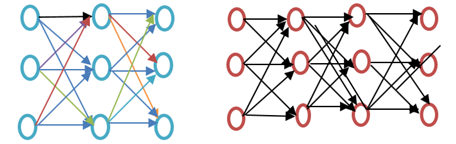

Modelo "Skip gram"

Dada una palabra informativa en una frase, el sistema preverá la probabilidad de que cada palabra de la frase sea una palabra cercana a esa palabra informativa. Las guías de preparación del sistema neuronal son conjuntos de palabras que comprenden la palabra informativa y sus palabras cercanas.

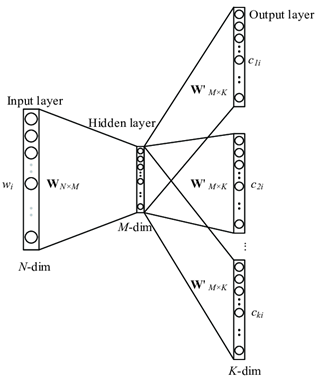

Modelo "Continous Bag of Words"

El modelo de bolsa de palabras continua (CBOW) es justo lo contrario que el modelo Skip-Gram. Para el modelo CBOW, la tarea de la red neuronal simple es: Dado un contexto de palabras (que rodea a una palabra) en una frase, la red predecirá la probabilidad de que cada palabra del vocabulario sea esa palabra.

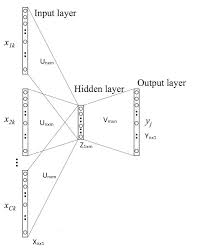

## Programemos...

Veamos la librería nltk (Natural Language Toolkit)

https://www.nltk.org/api/nltk.html

https://drive.google.com/drive/folders/1Yd5QrSk3dVjtb5l7OZuGlhUe1gwgK2y3?usp=sharing

In [ ]:
from nltk.corpus.reader import PlaintextCorpusReader


In [ ]:
 from google.colab import drive
import sys


drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root = '/content/drive/MyDrive/varios/estenograficas/'


In [ ]:
mananeras=PlaintextCorpusReader(root,'.*')

In [ ]:
print(type(mananeras))

<class 'nltk.corpus.reader.plaintext.PlaintextCorpusReader'>


In [ ]:
mananeras.fileids()

['2018-12-07',
 '2018-12-10',
 '2018-12-11',
 '2018-12-12',
 '2018-12-15',
 '2018-12-17',
 '2018-12-18',
 '2018-12-19',
 '2018-12-22',
 '2018-12-23',
 '2018-12-24',
 '2018-12-26',
 '2018-12-27',
 '2018-12-28',
 '2018-12-29',
 '2019-01-02',
 '2019-01-03',
 '2019-01-03-2da',
 '2019-01-04',
 '2019-01-07',
 '2019-01-08',
 '2019-01-09',
 '2019-01-09-2da',
 '2019-01-10',
 '2019-01-11',
 '2019-01-11-2da',
 '2019-01-12',
 '2019-01-14',
 '2019-01-15',
 '2019-01-16',
 '2019-01-17',
 '2019-01-18',
 '2019-01-19',
 '2019-01-19-2da',
 '2019-01-20',
 '2019-01-21',
 '2019-01-22',
 '2019-01-23',
 '2019-01-24',
 '2019-01-25',
 '2019-01-28',
 '2019-01-29',
 '2019-01-30',
 '2019-01-31',
 '2019-02-01',
 '2019-02-04',
 '2019-02-05',
 '2019-02-06',
 '2019-02-07',
 '2019-02-08',
 '2019-02-11',
 '2019-02-12',
 '2019-02-13',
 '2019-02-14',
 '2019-02-15',
 '2019-02-18',
 '2019-02-19',
 '2019-02-20',
 '2019-02-21',
 '2019-02-22',
 '2019-02-25',
 '2019-02-26',
 '2019-02-27',
 '2019-02-28',
 '2019-03-01',
 '2019-03

In [ ]:
len(mananeras.words())

6060318

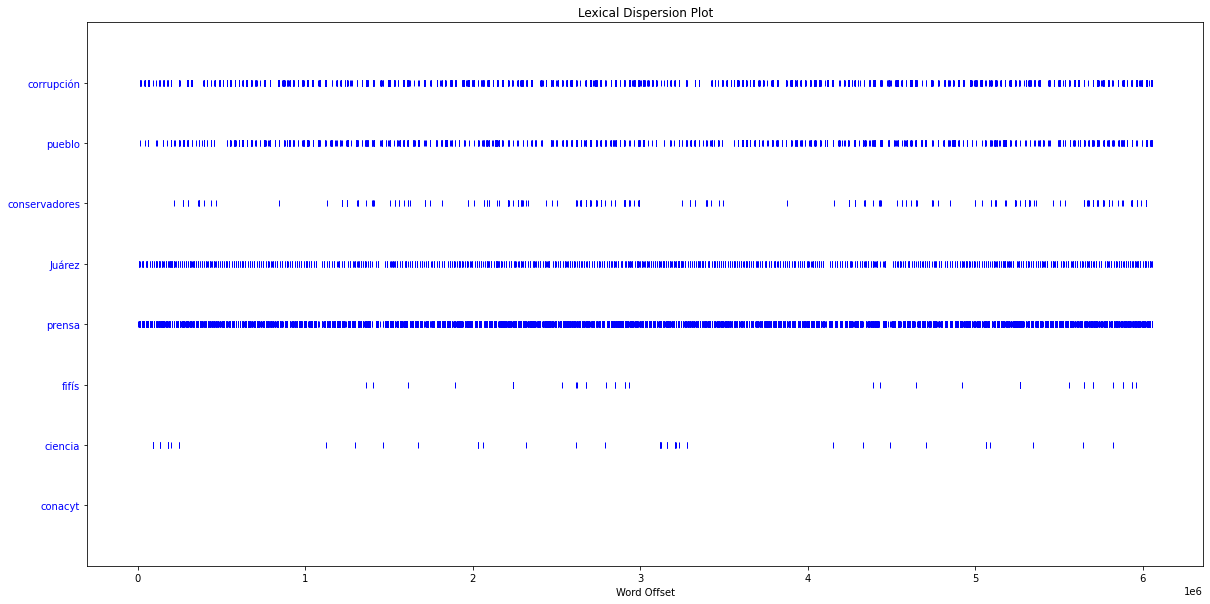

In [ ]:
import matplotlib.pyplot as plt
from nltk import Text,ConditionalFreqDist
plt.figure(figsize=(20,10))
Text(mananeras.words()).dispersion_plot(['corrupción','pueblo','conservadores','Juárez','prensa','fifís','ciencia','conacyt'])

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(Text(mananeras.words()))
top_ten = fdist.most_common(500)
print(top_ten)

[('-', 475322), ('.', 221812), ('="', 182902), (',', 178936), ('>', 142168), ('/', 137212), ('<', 116878), ('a', 116048), ('de', 107294), ('p', 106462), (':', 76456), ('menu', 73302), ('item', 69138), ('que', 62838), ('</', 61530), ('"', 56964), ('class', 56478), ('la', 55258), ('text', 53548), ('https', 43842), ('en', 42782), ('style', 42608), ('://', 41922), ('org', 41300), ('li', 40934), ('mx', 40684), ('.</', 40458), ('lopezobrador', 40442), ("='", 37450), ("'", 37018), ('el', 36522), ('align', 36388), ('justify', 34850), ('href', 34660), ('y', 32456), ('type', 32290), ('></', 30284), ('se', 30174), ('=', 27364), ('">', 26254), ('"><', 25138), (';', 25094), ('div', 24968), (';">', 24820), ('los', 24082), ('span', 23950), ('":"', 22684), ('strong', 21080), ('","', 20544), ('no', 20500), ('es', 20170), ('del', 18696), ('css', 18618), ('1', 18466), ('mejs', 18190), ('><', 17662), ('wp', 17604), ('post', 17128), ('/">', 16154), ('para', 15556), ('script', 15358), ('2019', 15238), ('con

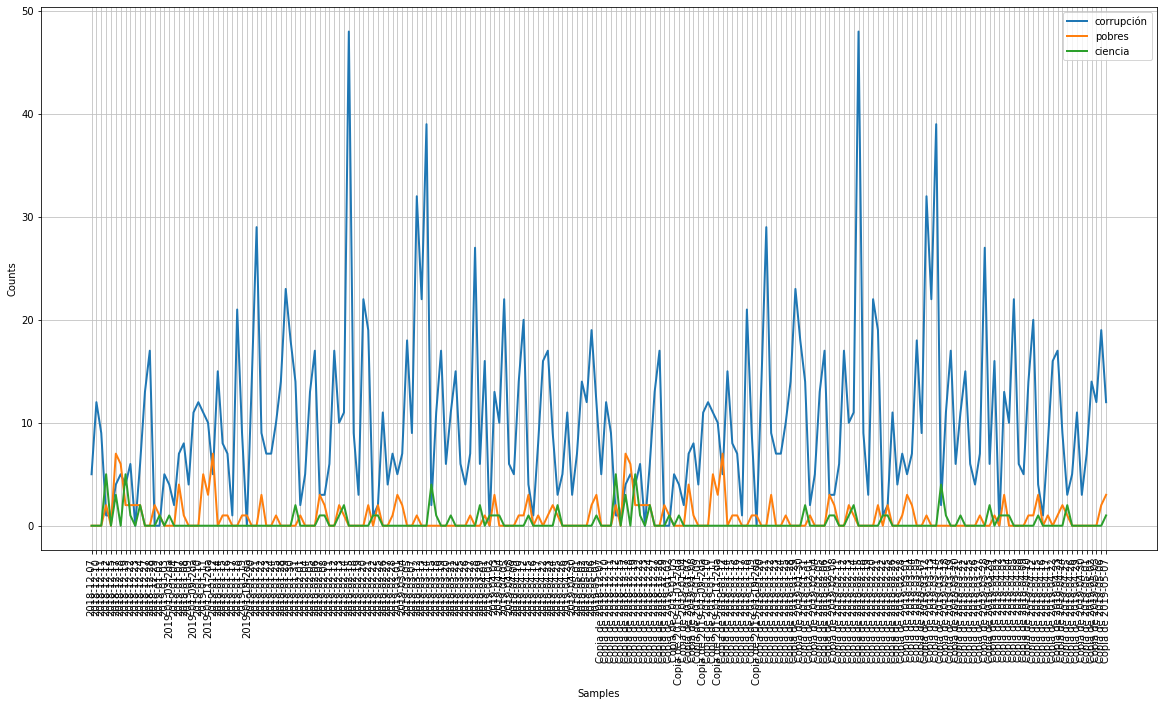

In [ ]:

plt.figure(figsize=(20,10))

cfd=ConditionalFreqDist((target,fileid[:])
    for fileid in mananeras.fileids()
                             for w in mananeras.words(fileid)
    for target in ['ciencia','corrupción','pobres']
                             if w.lower().startswith(target))
cfd.plot()

In [ ]:
mananeras

<PlaintextCorpusReader in '/content/drive/MyDrive/varios/estenograficas'>

https://radimrehurek.com/gensim/

In [ ]:
from gensim.models import word2vec

In [ ]:
from nltk.corpus import brown
from gensim.models import Word2Vec

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True


---



In [ ]:
model = Word2Vec(mananeras.sents(), size=100, window=20, min_count=2, workers=4)



In [ ]:
print(model.wv['ciencia'].shape)
print(model.wv['ciencia'])

(100,)
[ 0.3897337  -0.11481299 -0.08432109  0.26996908 -0.25320527 -0.19466764
  0.162931    0.5011332  -0.42182702  0.08186401  0.43694958  0.51019627
  0.19338168  0.06421341 -0.04629083  0.09144305 -0.08352747  0.3083312
 -0.14932816  0.06229149 -0.0202444   0.32043353 -0.36415625  0.18503064
 -0.3967656   0.3395624  -0.31014514  0.02628812 -0.36765614 -0.13678285
  0.2718354   0.22869208 -0.07950681  0.33655182 -0.33919433  0.45967287
 -0.314206    0.26156554 -0.09127142  0.094677   -0.45439237  0.16081259
  0.41413504  0.01117432  0.16226524  0.00773127 -0.36626652  0.00568391
  0.33731744  0.30607644 -0.44257012 -0.00568242  0.06273205  0.28390884
 -0.09302928  0.28727537  0.20867413 -0.05711297  0.17887142  0.21307757
 -0.2718446  -0.33144966  0.05510723 -0.00711874  0.19896455  0.26498118
  0.11940079 -0.46958524  0.4557012  -0.26524562 -0.02197296  0.03071823
  0.09995329 -0.12789723 -0.16487223 -0.15692756 -0.37714183 -0.32068622
  0.30455667  0.2080172   0.42557433  0.15041